In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('TaxiData.csv')

### Data Cleaning and Correction

In [4]:
# Dropping 'pickup_census_tract' column due to excessive missing values
data.drop(columns=['pickup_census_tract'], inplace=True)
# Mean imputation for numerical columns
numerical_columns = ['fare', 'trip_miles', 'trip_seconds', 'tips', 'dropoff_census_tract', 'dropoff_community_area']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)
# Mode imputation for categorical columns
categorical_columns = ['company', 'payment_type']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Dropping rows with missing latitude/longitude values
data.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)



# Convert 'trip_start_timestamp' to datetime
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'], unit='s')

/tmp/ipykernel_93557/1487645957.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipykernel_93557/1487645957.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# Part 3.a

## Subpart (a)

### Histograms for Fare and Tips along with line representing Kernel Density for the data

/tmp/ipykernel_93557/83170183.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


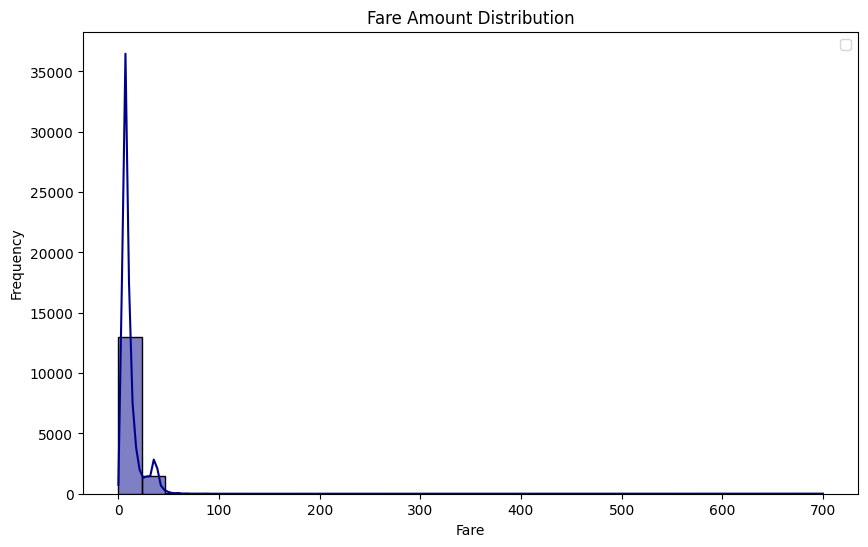

/tmp/ipykernel_93557/83170183.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


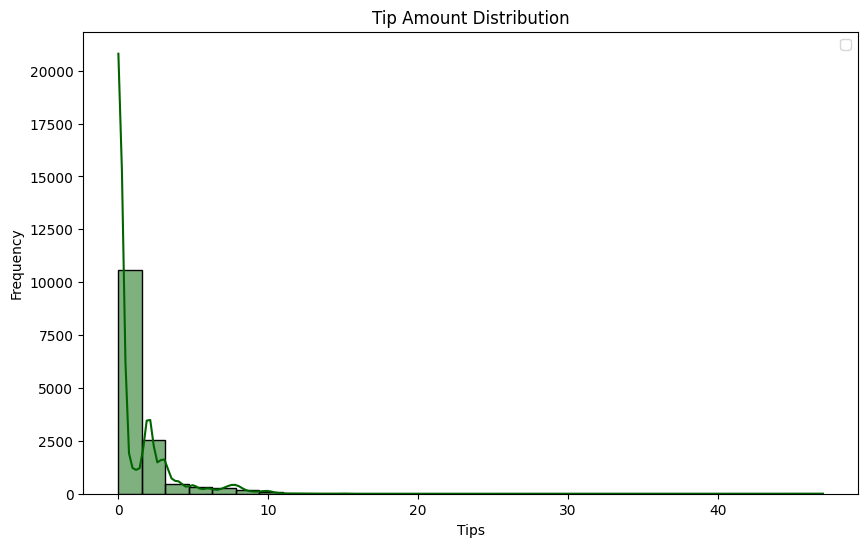

In [5]:
def plot_histogram(data, column, color, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color=color, bins=30, edgecolor='black')
    
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot histograms for fare and tip
plot_histogram(data, 'fare', 'darkblue', 'Fare Amount Distribution')
plot_histogram(data, 'tips', 'darkgreen', 'Tip Amount Distribution')

### Box Plots for Fare and Tips

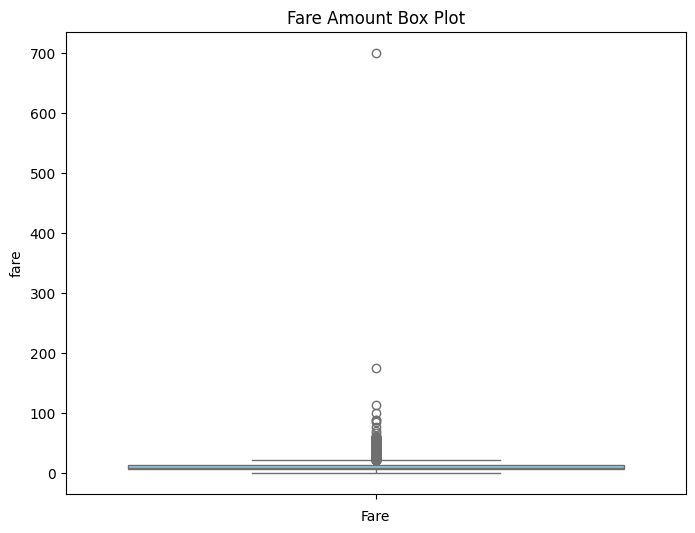

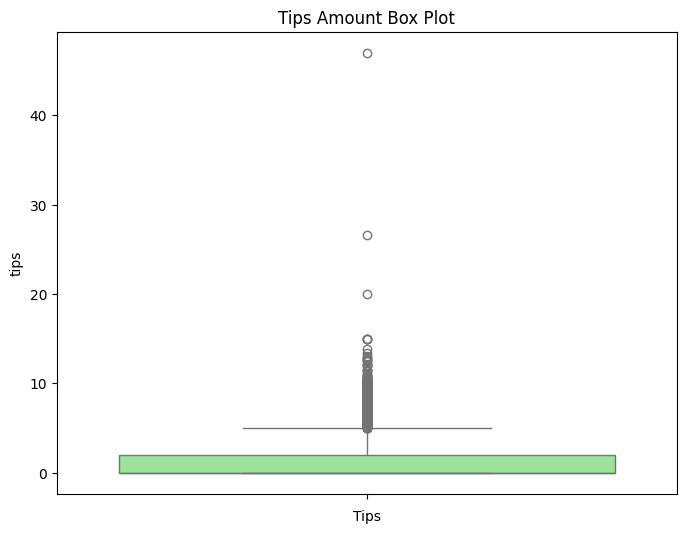

In [13]:
# Define a function to plot a box plot
def plot_boxplot(data, column_name, color, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[column_name], color=color)
    plt.title(title)
    plt.xlabel(column_name.capitalize())
    plt.show()
    
# Box plot for fare
plot_boxplot(data, 'fare', 'skyblue', 'Fare Amount Box Plot')

# Box plot for tips
plot_boxplot(data, 'tips', 'lightgreen', 'Tips Amount Box Plot')

## Subpart (b)

In [7]:
summary = data[['fare', 'tips']].describe()
print(summary)

               fare          tips
count  14520.000000  14520.000000
mean      11.321727      1.035544
std       11.006953      2.031519
min        0.000000      0.000000
25%        5.850000      0.000000
50%        7.850000      0.000000
75%       12.050000      2.000000
max      700.070000     47.000000


#### For Fare:
* <b>Range</b>     :       $700.07$
* <b>Outliers</b>  :       Can be easily identified in the Box plot for Fare, the points outside the whiskers of the box plots are the outliers
* <b>Clusters</b>  :       Can be seen as visible peaks of the KDE in the histogram, most of the clustering occurs for smaller values of fare, i.e., below 40

#### For Tips:
* <b>Range</b>     :       $47.00$
* <b>Outliers</b>  :       Can be easily identified in the Box plot for Tips, the points outside the whiskers of the box plots are the outliers
* <b>Clusters</b>  :       Can be seen as visible peaks of the KDE in the histogram, most of the clustering occurs for smaller values in this case too, i.e., less than 5

## Subpart (c)

From the summary above, we can see that
#### For Fare:
* Mean  = $11.768216$
* Median = $7.850000$
* Standard Deviation = $11.538850$
- There is more demand for taxi pickups at lower fares, and it rapidly decreases as fare increases. There are not more than 25% people who pay over 12.45 for a taxi
#### For Tips:
* Mean  = $1.076674$
* Median = $0.000000$
* Standard Deviation = $2.158340$
- The tips also tend to be smaller in amount, and not more than 25% people tip over 2

# Part 3.b

To understand the payment methods used by customers, we will visualize the frequency of each payment method using a bar chart. The payment_type field contains the information about the payment methods. We'll plot the count of each payment method to observe the distribution.

/tmp/ipykernel_93557/2035337649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='payment_type', data=data, palette='viridis')


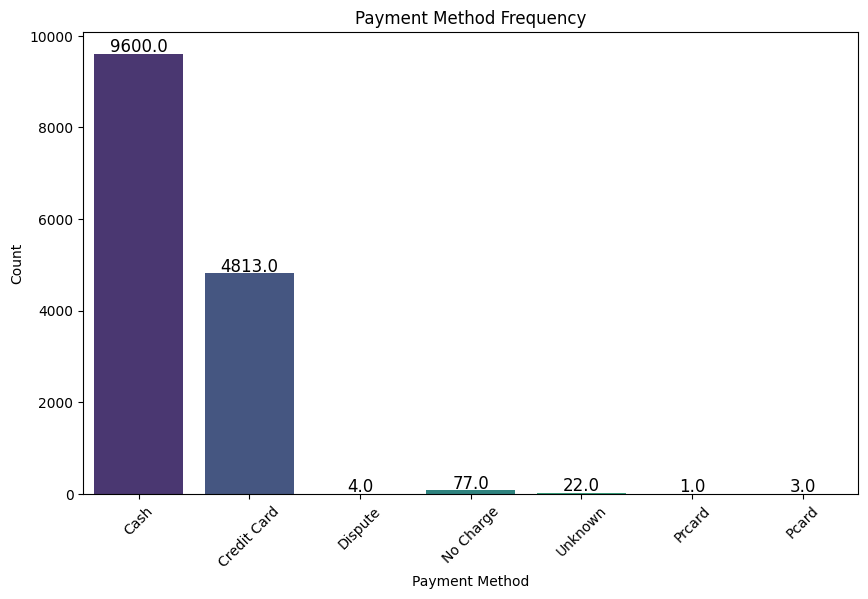

In [8]:
# Plotting the frequency of each payment method
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='payment_type', data=data, palette='viridis')

# Adding labels and title
plt.title('Payment Method Frequency')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.xticks(rotation=45)
plt.show()

From the bar chart generated above, we can observe the distribution of payment methods used by customers.<br>
* <b>Dominant Payment Methods</b>: Cash and Credit Card are the most dominant payment methods
* <b>Impact on Service Providers</b>: Since crdit cards are a dominant payment method, service providers may consider optimizing their systems to support and promote credit cards.

# Part 3.c

To understand how tips vary across different payment methods, we'll create a box plot that shows the distribution of tip amounts for each payment method.

/tmp/ipykernel_93557/3299319428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='tips', data=data, palette='Set2')


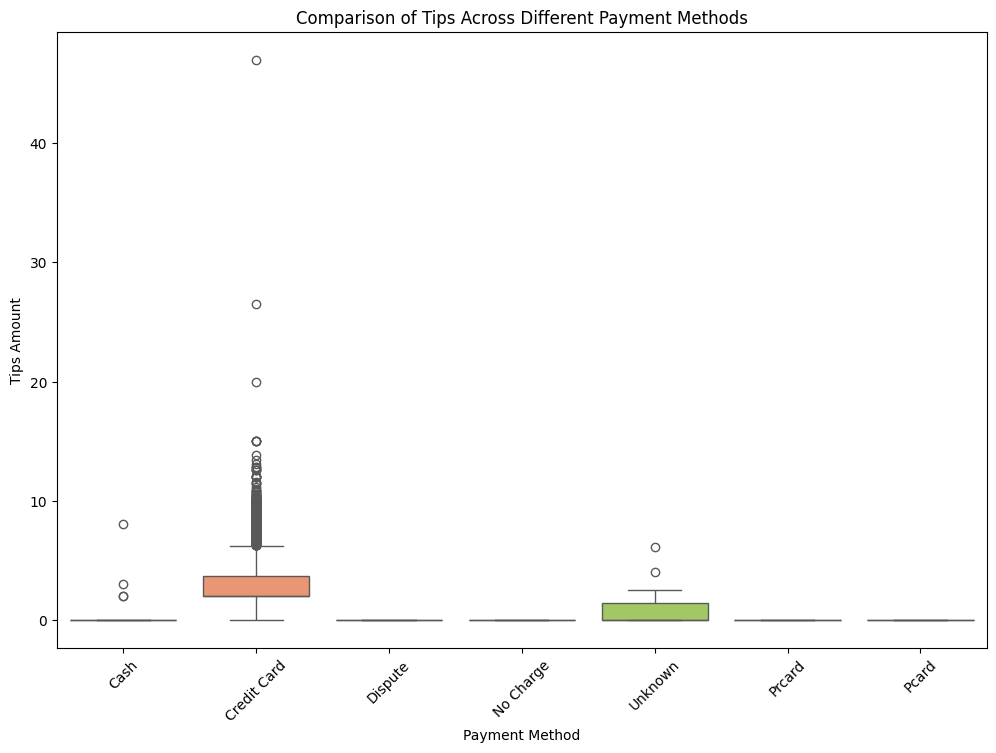

,payment_type,Q1(1st quartile),Q2(2nd quartile),Q3(3rd quartile),Count,Mean,Std Dev
0,Cash,0.0,0.0,0.00,9600.0,0.001568,0.092301
1,Credit Card,2.0,2.0,3.69,4813.0,3.116804,2.437181
2,Dispute,0.0,0.0,0.00,4.0,0.000000,0.000000
3,No Charge,0.0,0.0,0.00,77.0,0.000000,0.000000
4,Pcard,0.0,0.0,0.00,3.0,0.000000,0.000000
5,Prcard,0.0,0.0,0.00,1.0,0.000000,NaN
6,Unknown,0.0,0.0,1.38,22.0,0.903182,1.594748


In [9]:
# Plotting a boxplot to compare tips across different payment methods
plt.figure(figsize=(12, 8))
sns.boxplot(x='payment_type', y='tips', data=data, palette='Set2')

# Adding labels and title
plt.title('Comparison of Tips Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Tips Amount')

# Display the plot
plt.xticks(rotation=45)
plt.show()


# Group the data by payment method and calculate the quartiles for 'tips'
quartiles = data.groupby('payment_type')['tips'].describe(percentiles=[.25, .5, .75])
# Renaming the columns for clarity (Q1, Q2, Q3, etc.)
quartiles = quartiles[['25%', '50%', '75%', 'count', 'mean', 'std']]
# Rename columns to match desired Q1, Q2, Q3
quartiles.columns = ['Q1(1st quartile)', 'Q2(2nd quartile)', 'Q3(3rd quartile)', 'Count', 'Mean', 'Std Dev']
# Displaying the table
quartiles.reset_index(inplace=True)
# Show the quartile table
quartiles

We can notice that the tipping happens majorly by Credit Cards, and the amount tipped through other methods is very low in general, whereas Credit Card users tip a bit better which 25 % people tipping over 4.0 and more than 75 % people tipping over 2.0. In contrast, for all other mean, the median tip is 0.0

# Part 3.d

## Subpart (a)
This scatter plot will allow us to visually explore the relationship between trip distance and fare.

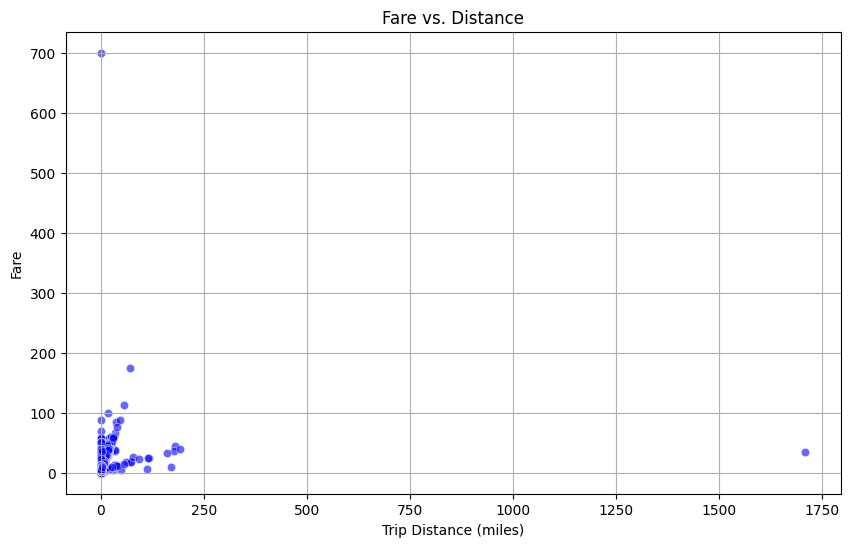

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='fare', data=data, color='b', alpha=0.6)

# Adding labels and title
plt.title('Fare vs. Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare')
plt.grid(True)

# Display the plot
plt.show()

## Subpart (b)
Calculation of the Correlation Coefficient between trip distance and fare

In [11]:
# Calculating the Pearson correlation coefficient between trip_miles and fare
correlation_coefficient = data['trip_miles'].corr(data['fare'])

print(f"Correlation Coefficient between Fare and Distance: {correlation_coefficient:.2f}")

Correlation Coefficient between Fare and Distance: 0.21


#### The correlation coefficient is found out to be $0.22$
We can see from the plot that although there is a somewhat positive correlation between the trip_distance and fare, there doesn't seem to be a particular pattern on which fare prices are affected by trip distance. That's why the plot is a bit spread out and not a single increasing line, thus leading to this smaller value of 0.22!

## Subpart (c)
Since the fare prices don't show a strong correlation to trip distance, we can't say that distance is the only factor affecting the fare and there might be other factors influencing them.<br>
* There might be some sort of base prices, traffic conditions or service charges which play a significant role. The fare deciding criterion may also include time-based surcharges for some specific locations.
* Now the implication of this weak correlation is that the passengers might not always feel that they are paying a fair amount for the travel, since it's not directly proportional to distance, which might cause dissatisfaction with the fare system.